In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
columns = ['State', 'Date', 'New Cases']
ny_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = pd.read_csv('files/data_table_for_daily_case_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=columns)
nyc_cases = nyc_cases[nyc_cases['New Cases'] != 0]
ny_cases = ny_cases[ny_cases['New Cases'] != 0]

In [3]:
ny_total = pd.merge(ny_cases, nyc_cases, on='Date', how='inner')
ny_total['New Cases Sum'] = ny_total['New Cases_x'] + ny_total['New Cases_y']
ny_total.rename(columns = {'New Cases_x' : 'New York (Exclude NYC) New Cases', 'New Cases_y': 'New York City New Cases'}, inplace = True)

In [4]:
ny_total.set_index(['Date'])
ny_total['Date'] = pd.to_datetime(ny_total['Date'])
ny_total = ny_total.sort_values(by="Date")
ny_total

,State_x,Date,New York (Exclude NYC) New Cases,State_y,New York City New Cases,New Cases Sum
548,New York,2020-03-05,11,New York City,1,12
547,New York,2020-03-06,9,New York City,5,14
546,New York,2020-03-07,7,New York City,3,10
545,New York,2020-03-09,97,New York City,7,104
544,New York,2020-03-10,12,New York City,21,33
...,...,...,...,...,...,...
4,New York,2021-09-01,2829,New York City,1785,4614
3,New York,2021-09-02,3256,New York City,2155,5411
2,New York,2021-09-03,3791,New York City,1499,5290
1,New York,2021-09-04,3374,New York City,1499,4873


<AxesSubplot:title={'center':'NY Daily Confirmed Cases'}, xlabel='Date', ylabel='Number of Cases'>

<Figure size 432x288 with 0 Axes>

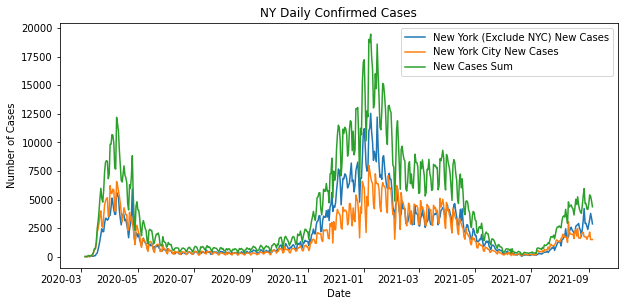

In [5]:
plt.figure()
ny_total.plot(x='Date',figsize=(10,5), ylabel='Number of Cases',rot=0,title='NY Daily Confirmed Cases')

In [6]:
us_deaths_sex_age = pd.read_csv('files/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv',usecols=['Year','State','Month','Sex','Age Group','COVID-19 Deaths','Group'],index_col=None)
ny_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_(excludes_nyc)_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])
nyc_deaths = pd.read_csv('files/data_table_for_daily_death_trends__new_york_city_.csv', index_col=None, skiprows=[0,1], usecols=['State','Date','New Deaths'])

In [7]:
nyc_deaths

,State,Date,New Deaths
0,New York City,Sep 6 2021,0
1,New York City,Sep 5 2021,12
2,New York City,Sep 4 2021,11
3,New York City,Sep 3 2021,11
4,New York City,Sep 2 2021,13
...,...,...,...
588,New York City,Jan 27 2020,0
589,New York City,Jan 26 2020,0
590,New York City,Jan 25 2020,0
591,New York City,Jan 24 2020,0


In [8]:
nyc_deaths = nyc_deaths[nyc_deaths['New Deaths'] != 0]
ny_deaths = ny_deaths[ny_deaths['New Deaths'] != 0]
ny_total_deaths = pd.merge(ny_deaths, nyc_deaths, on='Date', how='inner')

ny_total_deaths['New Deaths Sum'] = ny_total_deaths['New Deaths_x'] + ny_total_deaths['New Deaths_y']
ny_total_deaths.rename(columns = {'New Deaths_x' : 'New York (Exclude NYC) New Deaths', 'New Deaths_y': 'New York City New Deaths'}, inplace = True)
ny_total_deaths.set_index('Date')

ny_total_deaths['Date'] = pd.to_datetime(ny_total_deaths['Date'])
ny_total_deaths = ny_total_deaths.sort_values(by="Date")
ny_total_deaths

,State_x,Date,New York (Exclude NYC) New Deaths,State_y,New York City New Deaths,New Deaths Sum
514,New York,2020-03-19,4,New York City,11,15
513,New York,2020-03-20,10,New York City,24,34
512,New York,2020-03-21,6,New York City,27,33
511,New York,2020-03-22,3,New York City,50,53
510,New York,2020-03-23,7,New York City,50,57
...,...,...,...,...,...,...
4,New York,2021-09-01,18,New York City,10,28
3,New York,2021-09-02,24,New York City,13,37
2,New York,2021-09-03,20,New York City,11,31
1,New York,2021-09-04,18,New York City,11,29


<AxesSubplot:title={'center':'NY Daily Confirmed Cases'}, xlabel='Date', ylabel='Number of Deaths'>

<Figure size 432x288 with 0 Axes>

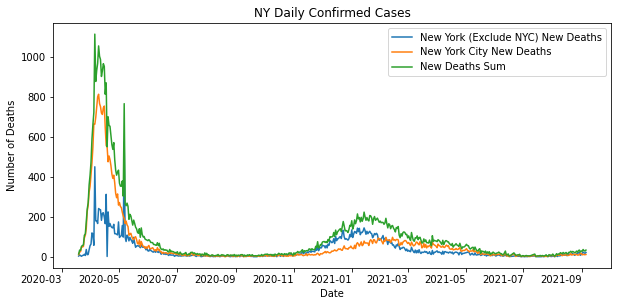

In [9]:
ny_total_deaths
plt.figure()
ny_total_deaths.plot(x='Date',figsize=(10,5), ylabel='Number of Deaths',rot=0,title='NY Daily Confirmed Cases')

In [10]:
us_deaths_sex_age

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,633786.0
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,94.0
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,400.0
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,50.0
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,133.0
...,...,...,...,...,...,...,...
63337,By Month,2021.0,8.0,Puerto Rico,Female,50-64 years,25.0
63338,By Month,2021.0,8.0,Puerto Rico,Female,55-64 years,16.0
63339,By Month,2021.0,8.0,Puerto Rico,Female,65-74 years,21.0
63340,By Month,2021.0,8.0,Puerto Rico,Female,75-84 years,12.0


In [11]:
ny_deaths_sex_age = us_deaths_sex_age[us_deaths_sex_age['State']=='New York']

In [12]:
ny_deaths_sex_age_monthly = ny_deaths_sex_age[ny_deaths_sex_age['Group']=='By Month']
ny_deaths_date_series = ny_deaths_sex_age_monthly['Year'].astype('int').astype('str') + "/" + ny_deaths_sex_age_monthly['Month'].astype('int').astype('str')
ny_deaths_sex_age_monthly['Date'] = pd.to_datetime(ny_deaths_date_series)

C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_16876/4075795640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_deaths_sex_age_monthly['Date'] = pd.to_datetime(ny_deaths_date_series)


In [13]:
ny_deaths_sex_age_monthly.set_index('Date')
ny_deaths_sex_age_monthly = ny_deaths_sex_age_monthly.drop(['Group','Year','Month','State'], axis=1)

In [14]:
ny_deaths_sex_age_monthly.head(20)

,Sex,Age Group,COVID-19 Deaths,Date
41922,All Sexes,All Ages,0.0,2020-01-01
41923,All Sexes,Under 1 year,0.0,2020-01-01
41924,All Sexes,0-17 years,0.0,2020-01-01
41925,All Sexes,1-4 years,0.0,2020-01-01
41926,All Sexes,5-14 years,0.0,2020-01-01
41927,All Sexes,15-24 years,0.0,2020-01-01
41928,All Sexes,18-29 years,0.0,2020-01-01
41929,All Sexes,25-34 years,0.0,2020-01-01
41930,All Sexes,30-39 years,0.0,2020-01-01
41931,All Sexes,35-44 years,0.0,2020-01-01


In [15]:
df_dic = {}
age_groups = ['0-17 years', '18-29 years', '30-39 years','40-49 years', '50-64 years','65-74 years','75-84 years']
sex_groups = ['Male', 'Female']
index = [ date[:7] for date in list(np.array(ny_deaths_sex_age_monthly['Date'].drop_duplicates().astype(str))) ]
index = [val+" "+sex for val in index for sex in sex_groups ]

for age_group in age_groups:
    l = []
    for sex in sex_groups:
        df =  ny_deaths_sex_age_monthly[(ny_deaths_sex_age_monthly['Age Group']==age_group) & (ny_deaths_sex_age_monthly['Sex']==sex) ]
        series = df['COVID-19 Deaths'].fillna(0)
        l_part = list(np.array(series))
        for i in range(20-len(l_part)):
            l_part.append(0)
        l.extend(l_part)
    df_dic[age_group] = l
        
deaths_plotdata = pd.DataFrame(df_dic, index=index)
deaths_plotdata

,0-17 years,18-29 years,30-39 years,40-49 years,50-64 years,65-74 years,75-84 years
2020-01 Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01 Female,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02 Male,0.0,0.0,15.0,16.0,84.0,84.0,109.0
2020-02 Female,0.0,15.0,47.0,163.0,756.0,964.0,1053.0
2020-03 Male,0.0,0.0,0.0,44.0,247.0,316.0,338.0
2020-03 Female,0.0,0.0,0.0,0.0,61.0,89.0,69.0
2020-04 Male,0.0,0.0,0.0,0.0,13.0,22.0,33.0
2020-04 Female,0.0,0.0,0.0,0.0,0.0,13.0,26.0
2020-05 Male,0.0,0.0,0.0,0.0,0.0,14.0,24.0
2020-05 Female,0.0,0.0,0.0,0.0,23.0,40.0,39.0


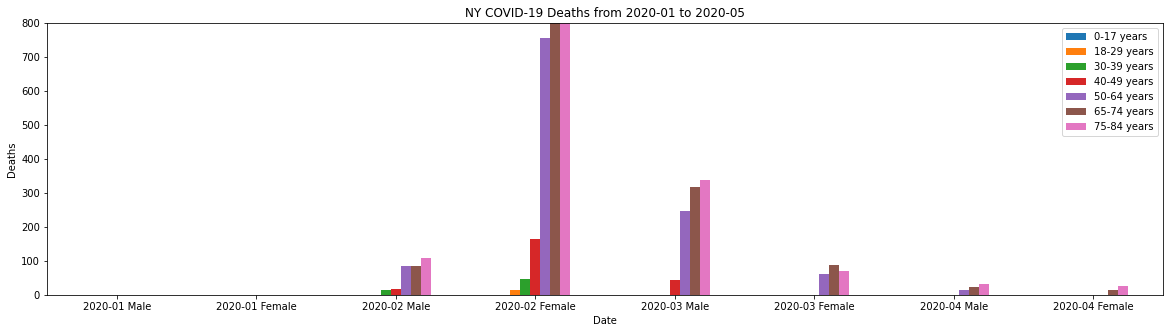

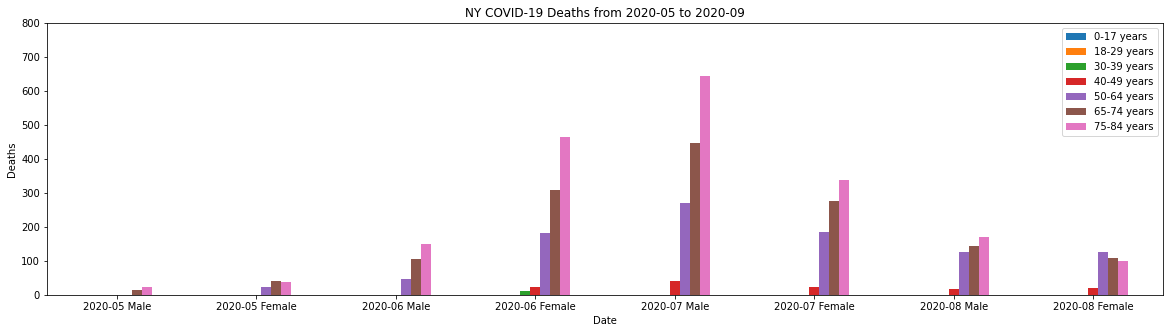

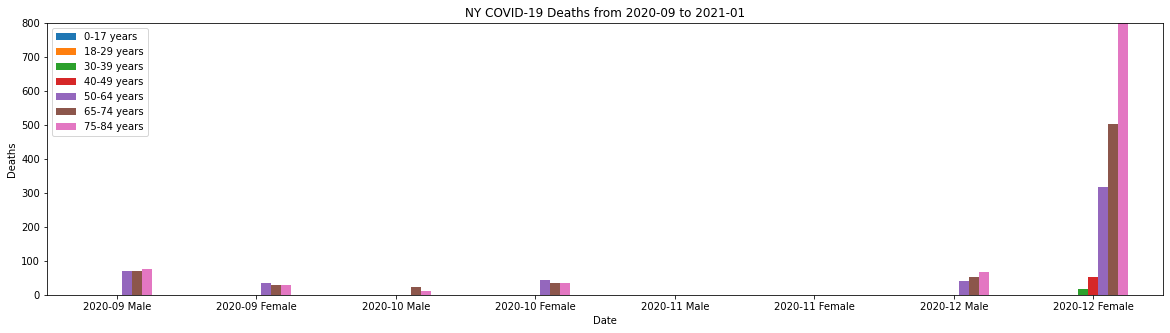

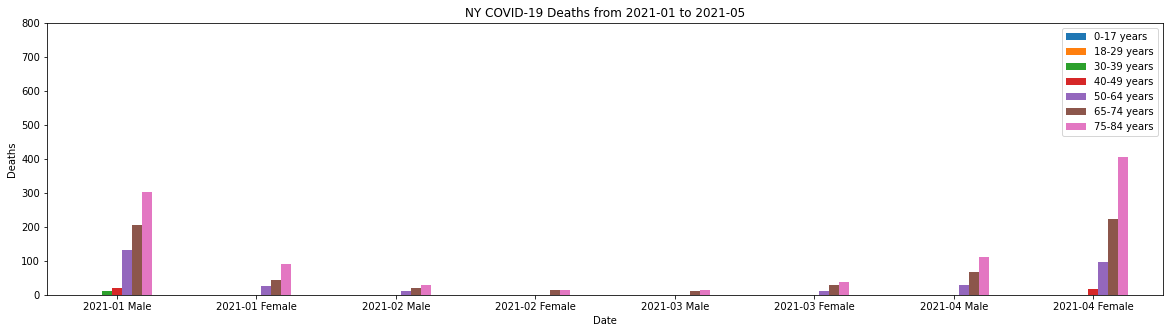

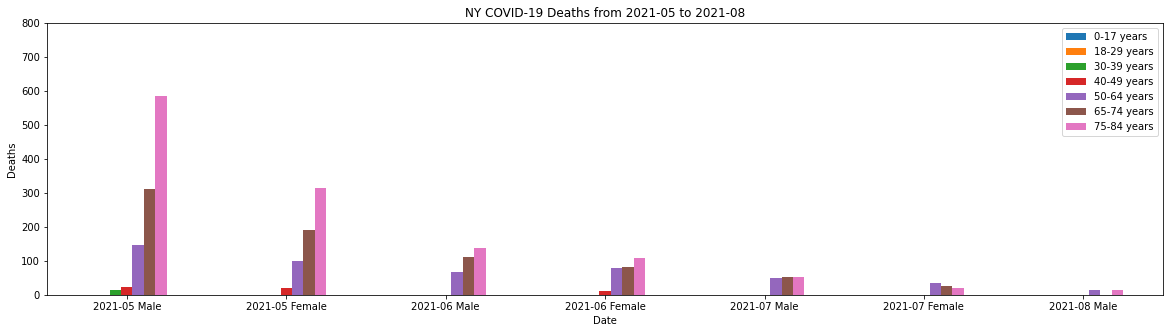

In [16]:
increment = 8
for i in range(0, len(index), increment):
    end = i+increment
    if end >= len(index):
        end = len(index)-1
    deaths_plotdata2 = deaths_plotdata.iloc[i:end]
    d = pd.DataFrame(deaths_plotdata2)
    d.plot(kind='bar',figsize=(20,5), rot=0)
    plt.title('NY COVID-19 Deaths from {} to {}'.format(index[i][:7], index[end][:7]))
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    plt.ylim(0,800)
    ax = plt.gca()
    plt.show()

In [27]:
d = deaths_plotdata

d['Sum'] = d['0-17 years'] + d['18-29 years'] + d['30-39 years']+ d['40-49 years'] +d['50-64 years'] +\
            d['65-74 years'] + d['75-84 years']
n = len(d)
d['Sex'] = ['Male', 'Female']*int(n/2)
d1 = d.iloc[:, 7:9]
d1.head()

,Sum,Sex
2020-01 Male,0.0,Male
2020-01 Female,0.0,Female
2020-02 Male,308.0,Male
2020-02 Female,2998.0,Female
2020-03 Male,945.0,Male


In [33]:
table = pd.pivot_table(d1, columns=['Sex'], index=['Sex'], aggfunc=np.sum, values=['Sum'], fill_value=0)
table

Sum      
Sex    Female  Male
Sex                
Female   9547     0
Male        0  6461

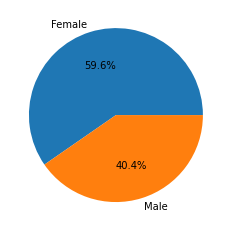

In [40]:
values = [table.iloc[0, 0], table.iloc[1, 1]]
labels = ['Female', 'Male']

plt.pie(values, labels=labels, autopct='%.1f%%')
plt.show()